# Feature selection

univariate selection

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from ipywidgets import widgets
import os
import plotly 
plotly.tools.set_credentials_file(username='anjgrg98', api_key='j2GJ3FbQpYIbv8BcODz3')
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
 data = pd.read_csv("/home/local/BHRI/agarg/06/datasets/cdhit_features.csv")
X=data.iloc[:, 1:97]
y= data.iloc[:, -2]

# X=np.nan_to_num(X)
# y=np.nan_to_num(y)

for col in X.keys():
    X[col].fillna(0, inplace=True)
    
y=pd.factorize(y)[0]

In [3]:
X.head()
y

array([0, 0, 0, ..., 1, 1, 1])

In [4]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Features       Score
25                  hmoment  525.443474
92      column_Basic_number  512.485553
90    column_Charged_number  374.723243
42                       mw  354.080285
38                lengthpep  344.676786
86   column_NonPolar_number  344.194890
82  column_Aliphatic_number  321.864193
88      column_Polar_number  317.655109
78       column_tiny_number  279.185058
84   column_Aromatic_number  278.547014


Feature importance

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators= 1000)
model.fit(X,y)
print(len(model.feature_importances_)) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

96


<Figure size 640x480 with 1 Axes>

96


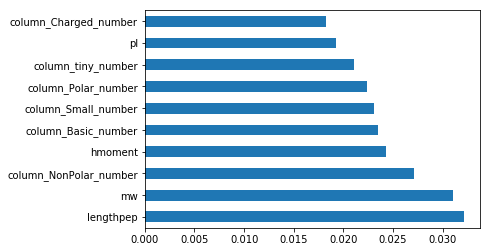

In [6]:
from sklearn.ensemble import RandomForestClassifier 
model1= RandomForestClassifier(n_estimators=1000, bootstrap= True, max_features= 'sqrt')
model1.fit(X, y)
print(len(model.feature_importances_)) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

correlation Matrix/ Heatmap

In [7]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
#plot heat map
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
corrmat

aindex  autocovariance  autocorrelation  \
aindex                       1.000000        0.266587         0.213464   
autocovariance               0.266587        1.000000         0.968586   
autocorrelation              0.213464        0.968586         1.000000   
BLOSUM1                     -0.661244       -0.282866        -0.230616   
BLOSUM2                     -0.560883       -0.156242        -0.105075   
BLOSUM3                     -0.443579       -0.058028        -0.037372   
BLOSUM4                     -0.065946       -0.001093        -0.021702   
BLOSUM5                     -0.254090       -0.085175        -0.076971   
BLOSUM6                      0.373636        0.034826         0.030153   
BLOSUM7                      0.121198        0.078200         0.092379   
BLOSUM8                      0.196568        0.090178         0.099221   
BLOSUM9                     -0.118521       -0.037768        -0.026531   
BLOSUM10                     0.130237        0.027646         0.030841   
boman                       -0.633999       -0.261077        -0.220060   
charge                      -0.014282       -0.052151        -0.040305   
crosscovariance              0.173294        0.916297         0.880383   
PP1                         -0.590376       -0.271663        -0.234277   
PP2                          0.132421        0.046815         0.046508   
PP3                         -0.156679       -0.086027        -0.063267   
F1                           0.513030        0.246317         0.202036   
F2                           0.515147        0.105569         0.076886   
F3                           0.356581        0.081061         0.069158   
F4                           0.752659        0.185274         0.158726   
F5                           0.033450        0.069586         0.059055   
F6                           0.039135       -0.025043        -0.029429   
hmoment                      0.103585       -0.146989        -0.155197   
hydrophobicity               0.759240        0.297314         0.238702   
instaindex                  -0.302667        0.058560         0.055830   
KF1                         -0.593644       -0.129600        -0.100019   
KF2                         -0.099437       -0.053433        -0.041888   
...                               ...             ...              ...   
VHSE2                       -0.071348       -0.078648        -0.060805   
VHSE3                        0.082462        0.000435        -0.005075   
VHSE4                       -0.625724       -0.158003        -0.100369   
VHSE5                        0.173292        0.032592         0.035141   
VHSE6                       -0.718145       -0.239633        -0.209407   
VHSE7                        0.120099       -0.062169        -0.027563   
VHSE8                       -0.314455       -0.057716        -0.051006   
Z1                          -0.725131       -0.288919        -0.241575   
Z2                          -0.400125       -0.138886        -0.114222   
Z3                          -0.501114       -0.040032        -0.036673   
Z4                          -0.170956       -0.020541         0.004916   
Z5                           0.394895        0.035359         0.024935   
column_tiny_number          -0.205513       -0.094638        -0.096003   
column_tiny_percentage      -0.246642       -0.031507        -0.026627   
column_Small_number         -0.197148       -0.100162        -0.102848   
column_Small_percentage     -0.295846       -0.068183        -0.065533   
column_Aliphatic_number      0.017164       -0.038179        -0.045300   
column_Aliphatic_percentage  0.911808        0.231467         0.185692   
column_Aromatic_number      -0.243764       -0.083778        -0.081410   
column_Aromatic_percentage  -0.282040       -0.010772         0.008191   
column_NonPolar_number      -0.140141       -0.069504        -0.072008   
column_NonPolar_percentage   0.473812        0.256024         0.227087   
column_Polar_number         -0.2114

In [9]:
top_corr_features

Index(['aindex', 'autocovariance', 'autocorrelation', 'BLOSUM1', 'BLOSUM2',
       'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8',
       'BLOSUM9', 'BLOSUM10', 'boman', 'charge', 'crosscovariance', 'PP1',
       'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'hmoment',
       'hydrophobicity', 'instaindex', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5',
       'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'lengthpep', 'MSWHIM1', 'MSWHIM2',
       'MSWHIM3', 'mw', 'pI', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4',
       'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'ST1', 'ST2', 'ST3', 'ST4',
       'ST5', 'ST6', 'ST7', 'ST8', 'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1',
       'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'column_tiny_number', 'column_tiny_percentage',
       'column_Small_number', 'column_Small_percentage',
       'column_Aliphatic_number', 'column_Aliphatic_percentage',
       'column_Aromatic_number', 'column_Aromatic_pe

In [10]:
sort=corrmat.values.argsort()
sort

array([[73, 70,  3, ..., 26, 83,  0],
       [73,  3, 16, ..., 15,  2,  1],
       [73, 16,  3, ..., 15,  1,  2],
       ...,
       [62, 75, 81, ..., 91, 41, 93],
       [69, 43,  9, ..., 88, 90, 94],
       [69,  9, 18, ..., 16, 56, 95]])

In [11]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

PP1                          column_tiny_number             0.000070
column_tiny_number           PP1                            0.000070
KF4                          F3                             0.000175
F3                           KF4                            0.000175
BLOSUM7                      column_Aromatic_percentage     0.000197
column_Aromatic_percentage   BLOSUM7                        0.000197
lengthpep                    ProtFP7                        0.000403
ProtFP7                      lengthpep                      0.000403
VHSE3                        autocovariance                 0.000435
autocovariance               VHSE3                          0.000435
ST8                          column_Small_number            0.000465
column_Small_number          ST8                            0.000465
ProtFP8                      F3                             0.000482
F3                           ProtFP8                        0.000482
VHSE5                        boman

In [12]:
so.iloc[-116:-96:2]


lengthpep                   column_Polar_number        0.979889
                            column_Small_number        0.981314
mw                          column_NonPolar_number     0.981538
column_NonPolar_percentage  column_Polar_percentage    0.983909
column_Small_number         column_NonPolar_number     0.985251
mw                          column_Polar_number        0.985651
column_Small_number         column_tiny_number         0.988271
lengthpep                   column_NonPolar_number     0.988788
T1                          ST1                        0.997905
mw                          lengthpep                  0.998205
dtype: float64

IMPORTANT FEATURES VARIATIONS USING BOXPLOTS 

In [13]:
def boxplots(feature= "tiny"):
    
    boxplot_cdhit = go.Box(
    name="dataset_cdhit",
    y= X[feature]

    )

    
    data = [boxplot_cdhit]
    iplot(data)
   
from ipywidgets import interact, fixed
# all we need to do is specify here what function we are interacting with
interact(boxplots,feature=X.keys())
    

interactive(children=(Dropdown(description='feature', options=('aindex', 'autocovariance', 'autocorrelation', …

<function __main__.boxplots(feature='tiny')>

DIMENSIONALITY REDUCTION

In [14]:
a = X.isnull().sum()/len(X)*100


In [15]:
# MISSING VALUE RATIO
# checking the percentage of missing values in each variable

# saving missing values in a variable
a = X.isnull().sum()/len(X)*100
# saving column names in a variable
features = X.keys()
variable = [ ]
for i in range(0,96):
    if a[i]<=1:   #setting the threshold as 20%
        variable.append(features[i])
        
variable

['aindex',
 'autocovariance',
 'autocorrelation',
 'BLOSUM1',
 'BLOSUM2',
 'BLOSUM3',
 'BLOSUM4',
 'BLOSUM5',
 'BLOSUM6',
 'BLOSUM7',
 'BLOSUM8',
 'BLOSUM9',
 'BLOSUM10',
 'boman',
 'charge',
 'crosscovariance',
 'PP1',
 'PP2',
 'PP3',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'hmoment',
 'hydrophobicity',
 'instaindex',
 'KF1',
 'KF2',
 'KF3',
 'KF4',
 'KF5',
 'KF6',
 'KF7',
 'KF8',
 'KF9',
 'KF10',
 'lengthpep',
 'MSWHIM1',
 'MSWHIM2',
 'MSWHIM3',
 'mw',
 'pI',
 'ProtFP1',
 'ProtFP2',
 'ProtFP3',
 'ProtFP4',
 'ProtFP5',
 'ProtFP6',
 'ProtFP7',
 'ProtFP8',
 'ST1',
 'ST2',
 'ST3',
 'ST4',
 'ST5',
 'ST6',
 'ST7',
 'ST8',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'VHSE1',
 'VHSE2',
 'VHSE3',
 'VHSE4',
 'VHSE5',
 'VHSE6',
 'VHSE7',
 'VHSE8',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'column_tiny_number',
 'column_tiny_percentage',
 'column_Small_number',
 'column_Small_percentage',
 'column_Aliphatic_number',
 'column_Aliphatic_percentage',
 'column_Aromatic_number',
 'column_Aromatic_percentage',
 

In [16]:
variance=X.var()
print(variance)

aindex                         1483.761841
autocovariance                    0.046086
autocorrelation                   0.040374
BLOSUM1                           0.062809
BLOSUM2                           0.039133
BLOSUM3                           0.052167
BLOSUM4                           0.025126
BLOSUM5                           0.031858
BLOSUM6                           0.029781
BLOSUM7                           0.024660
BLOSUM8                           0.016919
BLOSUM9                           0.015552
BLOSUM10                          0.014816
boman                             1.819285
charge                           24.673206
crosscovariance                   0.048805
PP1                               0.038132
PP2                               0.019165
PP3                               0.015366
F1                                0.050608
F2                                0.075545
F3                                0.055702
F4                                0.083710
F5         

In [17]:
# VARIANCE OF FEATUIRES

variance= X.var()
features= X.keys()
high_var= []

for i in range(len(X.keys())):
    if variance[i]>=1:
        high_var.append(features[i])
        
high_var        

['aindex',
 'boman',
 'charge',
 'instaindex',
 'lengthpep',
 'mw',
 'pI',
 'ProtFP1',
 'ProtFP2',
 'column_tiny_number',
 'column_tiny_percentage',
 'column_Small_number',
 'column_Small_percentage',
 'column_Aliphatic_number',
 'column_Aliphatic_percentage',
 'column_Aromatic_number',
 'column_Aromatic_percentage',
 'column_NonPolar_number',
 'column_NonPolar_percentage',
 'column_Polar_number',
 'column_Polar_percentage',
 'column_Charged_number',
 'column_Charged_percentage',
 'column_Basic_number',
 'column_Basic_percentage',
 'column_Acidic_number',
 'column_Acidic_percentage']

In [18]:
# HIGH CORRELATION FILTER
correlation= X.corr()
print(correlation)


                               aindex  autocovariance  autocorrelation  \
aindex                       1.000000        0.266071         0.213512   
autocovariance               0.266071        1.000000         0.968626   
autocorrelation              0.213512        0.968626         1.000000   
BLOSUM1                     -0.661244       -0.279571        -0.227969   
BLOSUM2                     -0.560883       -0.155406        -0.105405   
BLOSUM3                     -0.443579       -0.058389        -0.037957   
BLOSUM4                     -0.065946       -0.000404        -0.020628   
BLOSUM5                     -0.254090       -0.084187        -0.076095   
BLOSUM6                      0.373636        0.036159         0.031488   
BLOSUM7                      0.121198        0.077310         0.091330   
BLOSUM8                      0.196568        0.088343         0.097325   
BLOSUM9                     -0.118521       -0.037766        -0.026657   
BLOSUM10                     0.130237 

In [19]:
#BACKWARD FEATURE ELIMINATION

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(X, y)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

rf_model= RandomForestClassifier(n_estimators= 1000, max_features= "sqrt")
rf_model.fit(X_train, y_train)

y_pred=rf_model.predict(X_test)

In [88]:
X.keys()


Index(['aindex', 'autocovariance', 'autocorrelation', 'BLOSUM1', 'BLOSUM2',
       'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8',
       'BLOSUM9', 'BLOSUM10', 'boman', 'charge', 'crosscovariance', 'PP1',
       'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'hmoment',
       'hydrophobicity', 'instaindex', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5',
       'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'lengthpep', 'MSWHIM1', 'MSWHIM2',
       'MSWHIM3', 'mw', 'pI', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4',
       'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'ST1', 'ST2', 'ST3', 'ST4',
       'ST5', 'ST6', 'ST7', 'ST8', 'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1',
       'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'column_tiny_number', 'column_tiny_percentage',
       'column_Small_number', 'column_Small_percentage',
       'column_Aliphatic_number', 'column_Aliphatic_percentage',
       'column_Aromatic_number', 'column_Aromatic_pe

In [99]:
performance= []
columns= [item for item in X.keys()]
print(type(columns))
for i in range(len(columns)):
    cols= [col for col in columns if col!=columns[i]]
    X_try= X[cols]
    X_train_try, X_test_try, y_train, y_test= train_test_split(X_try, y, random_state=0) 
    rf_model.fit(X_train_try, y_train)
    y_pred= rf_model.predict(X_test_try)
    performance.append(accuracy_score(y_test, y_pred))



<class 'list'>


In [100]:
print(performance)

[0.8839177750906893, 0.8887545344619106, 0.8911729141475212, 0.8863361547762999, 0.8875453446191052, 0.8814993954050786, 0.8839177750906893, 0.8839177750906893, 0.8851269649334945, 0.8839177750906893, 0.8851269649334945, 0.8851269649334945, 0.8875453446191052, 0.8851269649334945, 0.8923821039903265, 0.8863361547762999, 0.8899637243047158, 0.8899637243047158, 0.8863361547762999, 0.8863361547762999, 0.8875453446191052, 0.8899637243047158, 0.8851269649334945, 0.8827085852478839, 0.8839177750906893, 0.8899637243047158, 0.8887545344619106, 0.8827085852478839, 0.8875453446191052, 0.8887545344619106, 0.8887545344619106, 0.8887545344619106, 0.8863361547762999, 0.8839177750906893, 0.8887545344619106, 0.8839177750906893, 0.8863361547762999, 0.8899637243047158, 0.8839177750906893, 0.8863361547762999, 0.8887545344619106, 0.8851269649334945, 0.8863361547762999, 0.8839177750906893, 0.8887545344619106, 0.8875453446191052, 0.8899637243047158, 0.8875453446191052, 0.8887545344619106, 0.8899637243047158,

In [127]:
performance.sort()
print(performance)

[0.8802902055622733, 0.8814993954050786, 0.8827085852478839, 0.8827085852478839, 0.8827085852478839, 0.8827085852478839, 0.8827085852478839, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8839177750906893, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8851269649334945, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8863361547762999, 0.8875453446191052, 0.8875453446191052, 0.8875453446191052,

In [149]:
#FORWARD SELECTION OF FEATURE

cols= ["Feature", "Performance"]
perf= dict(columns= cols)

perf.update({"aindex": 0.01})
perf.update({"PPI3": 0.001})
print(type(perf))
sorted_x = [(k,v) for (k,v) in sorted(perf.items())]

<class 'dict'>


TypeError: 'numpy.ndarray' object is not callable

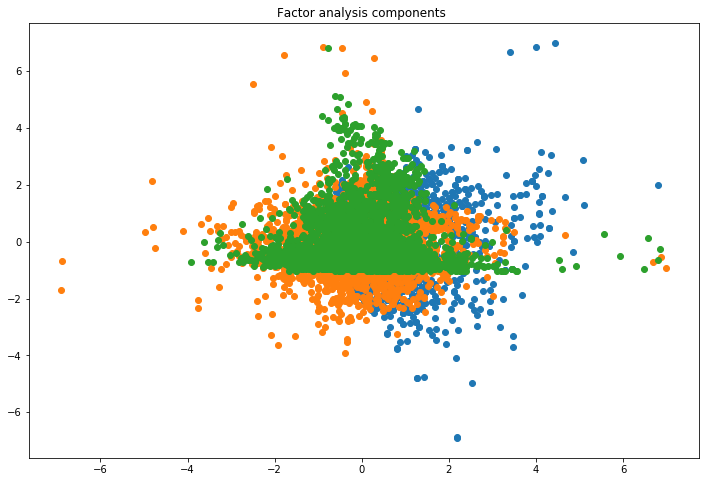

In [20]:
# FACTOR ANALYSIS

from sklearn.decomposition import FactorAnalysis

FA= FactorAnalysis(n_components= 23).fit_transform(X)

plt.figure(figsize=(12,8))
plt.title("Factor analysis components ")
plt.scatter(FA[:, 0], FA[:, 1])
plt.scatter(FA[:, 1], FA[:, 2])
plt.scatter(FA[:, 2], FA[:, 0])

In [21]:
#PRINCIPAL COMPONENT ANALYSIS

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

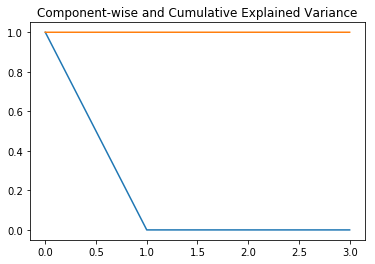

In [22]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In [23]:
print(pca_result)

[[-7.44770875e+02 -6.57708864e+01 -8.46304841e+00 -7.79322954e+00]
 [-5.20817955e+03  8.90355908e+01  5.96513319e+00  2.08950880e+01]
 [-5.21326650e+03  4.19697974e+01  6.55725161e+00  1.46726337e+01]
 ...
 [-2.49472324e+03  2.47838107e+01  1.53443450e+00 -1.11667827e+01]
 [-5.43555320e+03 -6.47122400e+01 -2.62666394e-01  7.40011344e+00]
 [-3.76156750e+03 -1.43545012e+02  1.08595788e+02 -3.20187547e+01]]


In [26]:
# BOXPLOTS

def boxplots(feature='feature1'):
    '''
    Plotting boxplot
    '''    
    
    i=list(X.keys()).index(feature)
    
    boxplot_dataset1 = go.Box(
        name=X.keys()[i],
        y=X.iloc[i]
    )
    boxplot_dataset2 = go.Box(
        name=X.keys()[i+1],
        y=X.iloc[i+1]
    )
#     boxplot_dataset3 = go.Box(
#         name=X.keys()[i+2],
#         y=X.iloc[i+2]
#     )
#     boxplot_dataset4 = go.Box(
#         name=X.keys()[i+3],
#         y=X.iloc[i+3]
#     )
#     boxplot_dataset5 = go.Box(
#         name=X.keys()[i+4],
#         y=X.iloc[i+4]
#     )
    data = [boxplot_dataset1, boxplot_dataset2]
    iplot(data)
    
from ipywidgets import interact, fixed
# all we need to do is specify here what function we are interacting with
interact(boxplots,feature=X.columns)

interactive(children=(Dropdown(description='feature', options=('aindex', 'autocovariance', 'autocorrelation', …

<function __main__.boxplots(feature='feature1')>